Contrast Stretching

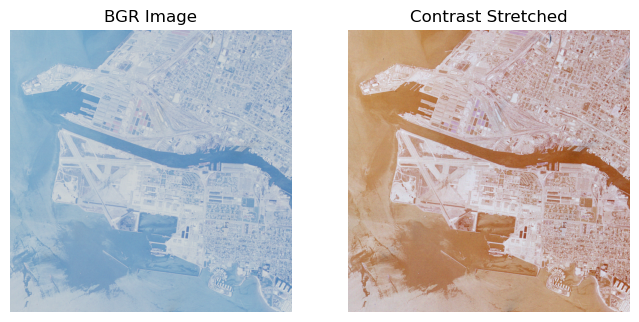

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load file
file = 'Oakland.png'
img_bgr = cv2.imread(file)

# Get height and h,w
min = 0
max = 255
(h, w, chan) = img_bgr.shape

# Method 1
# Split image into color channels
b, g, r = cv2.split(img_bgr)

# Apply contrast stretching to each channel
stretched_b = ((b - np.min(b)) / (np.max(b) - np.min(b))) * (max - min) + min
stretched_g = ((g - np.min(g)) / (np.max(g) - np.min(g))) * (max - min) + min
stretched_r = ((r - np.min(r)) / (np.max(r) - np.min(r))) * (max - min) + min


img_1 = cv2.merge((stretched_b, stretched_g, stretched_r))
# Convert to uint8 data type
img_1 = img_1.astype(np.uint8)


################# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.set_title('BGR Image')
ax1.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

# Display the new image
ax2.set_title('Contrast Stretched')
ax2.imshow(img_1)

# Hide the axes and show the figure
ax1.axis('off')
ax2.axis('off')
plt.show()


 

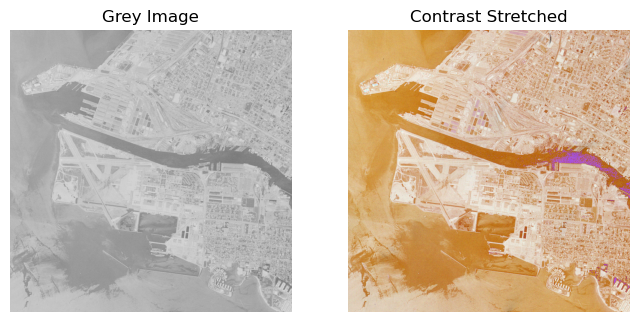

In [11]:
# Method 2 - Convert Image to hsvscale
img_grey = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

grey_min = np.min(img_grey)
grey_max = np.max(img_grey)

stretched_grey = ((img_grey - grey_min) / (grey_max - grey_min)) * (max - min) + min



# Split image into color channels
b, g, r = cv2.split(img_bgr)

# Apply contrast stretching to each channel
stretched_b = ((b - grey_min) / (grey_max - grey_min)) * (max - min) + min
stretched_g = ((g - grey_min) / (grey_max - grey_min)) * (max - min) + min
stretched_r = ((r - grey_min) / (grey_max - grey_min)) * (max - min) + min

img_2 = cv2.merge((stretched_b, stretched_g, stretched_r))
# Convert to uint8 data type
img_2 = img_2.astype(np.uint8)

################# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.set_title('Grey Image')
ax1.imshow(cv2.cvtColor(img_grey, cv2.COLOR_GRAY2RGB))

# Display the new image
ax2.set_title('Contrast Stretched')
ax2.imshow(img_2)

# Hide the axes and show the figure
ax1.axis('off')
ax2.axis('off')
plt.show()


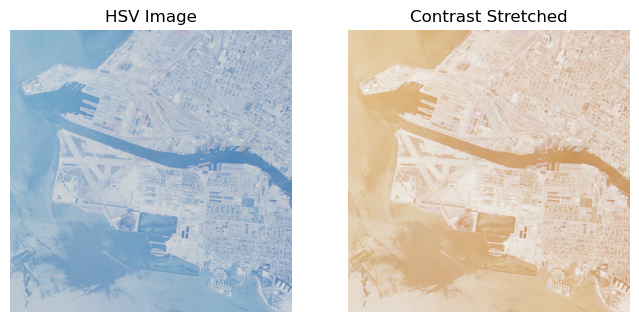

In [14]:
# Method 3 
# Convert BGR to HSV
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

hsv_min = np.min(img_hsv)
hsv_max = np.max(img_hsv)

stretched_hsv = ((img_hsv - hsv_min) / (hsv_max - hsv_min)) * (max - min) + min



# Split image into color channels
b, g, r = cv2.split(img_bgr)

# Apply contrast stretching to each channel
stretched_b = ((b - hsv_min) / (hsv_max - hsv_min)) * (max - min) + min
stretched_g = ((g - hsv_min) / (hsv_max - hsv_min)) * (max - min) + min
stretched_r = ((r - hsv_min) / (hsv_max - hsv_min)) * (max - min) + min

img_3 = cv2.merge((stretched_b, stretched_g, stretched_r))
# Convert to uint8 data type
img_3 = img_3.astype(np.uint8)

################# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.set_title('HSV Image')
ax1.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))

# Display the new image
ax2.set_title('Contrast Stretched')
ax2.imshow(img_3)

# Hide the axes and show the figure
ax1.axis('off')
ax2.axis('off')
plt.show()

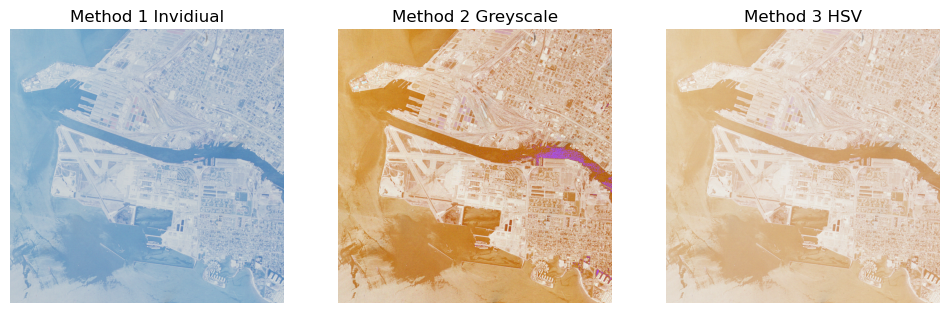

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.set_title('Method 1 Invidiual')
ax1.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

# Display the new image
ax2.set_title('Method 2 Greyscale')
ax2.imshow(img_2)

# Display the new image
ax3.set_title('Method 3 HSV')
ax3.imshow(img_3)

# Hide the axes and show the figure
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
plt.show()

It appears grey worked the best possibly because the buildings the images are contrasted against the background less clearly in the greyscale image. Thus the contrast stretching clearly creates a stronger contrast in that region which may be more ideal for this use case. The contrast different for the rgb images and hsv images are higher already and thus, the details are not brought out as much when needed to be stretched with the equation.